In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.integrate import ode, odeint, solve_ivp

In [2]:
def customize_axes(ax, x_p=0, y_p=0, x_p_direction='bottom', y_p_direction='left'):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position(x_p_direction)
    ax.spines['bottom'].set_position(('data', y_p))
    ax.yaxis.set_ticks_position(y_p_direction)
    ax.spines['left'].set_position(('data', x_p))
    ax.plot(1, 1*x_p, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(1*y_p, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

**EXAMPLE 7.3.1** :                                                                                                                                            
Consider the system

$\qquad\qquad\begin{aligned} \dot r &= r(1-r^2) + \mu r \cos\theta, \\ \dot\theta &= 1 . \end{aligned} \tag{1}$

When $\mu = 0$, there is a stable limit cycle at $r=1$, as discussed in Example 7.1.1.                                                                        
Show that a closed orbit still exists for $\mu \neq 0$, as long as $\mu$ is sufficiently small.


#### Solution

We seek two concentric circles with radii $r_{\min}$ and $r_{\max}$, such that
$\dot r > 0$ on the inner circle and $\dot r < 0$ on the outer circle.                                                                                              
Then the annulus $ 0 < r_{\min} \le r \le r_{\max}$ will be our desired trapping region.                                                                                                                            
Note that there are no fixed points in the annulus since $\dot\theta \neq 0$;                                                                                            
hence if $r_{\min}$ and $r_{\max}$ can be found, the Poincaré–Bendixson Theorem will imply the existence of a closed orbit.

To find $r_{\min}$, we require

$\qquad\qquad\dot r = r(1-r^2) + \mu r \cos\theta > 0 \quad \text{for all } \theta .$

Since $\cos\theta \ge -1$, a sufficient condition for $r_{\min}$ is

$\qquad\qquad 1 - r^2 - \mu > 0.$

Hence any $r_{\min} < \sqrt{\,1-\mu\,}$ will work, as long as $\mu < 1$ so that the square root makes sense.                                                   
We should choose $r_{\min}$ as large as possible, to hem in the limit cycle as tightly as we can.                                                                
For instance, we could pick

$\qquad\qquad r_{\min} = 0.999\sqrt{\,1-\mu\,}.$

Even $r_{\min} = \sqrt{\,1-\mu\,}$ works, but more careful reasoning is required.

By a similar argument, the flow is inward on the outer circle if

$\qquad\qquad r_{\max} = 1.001\sqrt{\,1+\mu\,}.$

Therefore a closed orbit exists for all $\mu < 1$, and it lies somewhere in the annulus

$\qquad\qquad 0.999\sqrt{\,1-\mu\,} \;\le\; r \;\le\; 1.001\sqrt{\,1+\mu\,}.$

**7.3.8** Recall the system                                                                                                                                                 
$\qquad\qquad\begin{aligned}\dot{r} &= r(1 - r^2) + \mu r \cos \theta \\
\dot{\theta}&=1 \end{aligned} \qquad\qquad$ of *Example **7.3.1***                                                                                                                                 
Using the computer, plot the phase portrait for various values of $\mu > 0$.                                                                                      
Is there a critical value $\mu_c$ at which the closed orbit ceases to exist ?                                                                                           
If so, estimate it. If not, prove that a closed orbit exists for all $\mu > 0$.

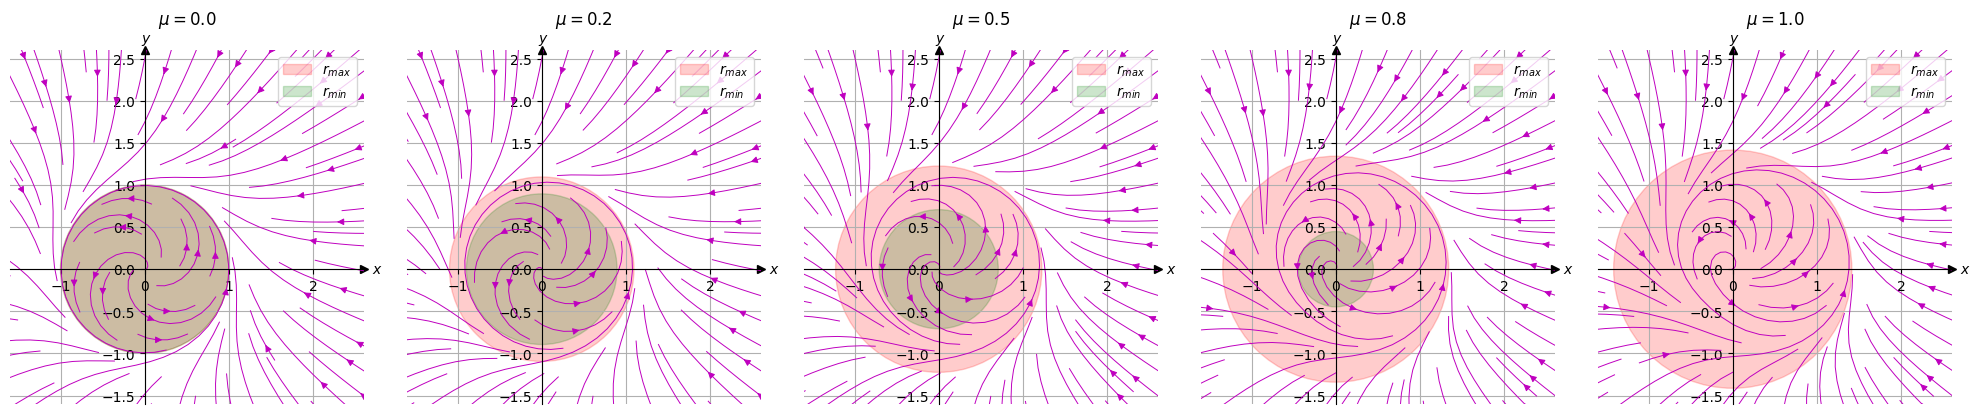

In [3]:
def plot_phase_portrait(ax, mu):
    def r_dot(r, theta):
        return r * (1 - r**2) + mu * r * np.cos(theta)
    
    # Trapping annulus radii
    r_min = np.sqrt(max(0, 1 - mu))
    r_max = np.sqrt(1 + mu)
    
    # Grid
    x = np.linspace(-3, 3, 400)
    y = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x, y)
    
    R = np.sqrt(X**2 + Y**2)
    Theta = np.arctan2(Y, X)
    R_nonzero = np.where(R == 0, 1, R)
    
    # Vector field
    R_dot_vals = r_dot(R, Theta)
    U = (R_dot_vals * (X / R_nonzero)) - Y
    V = (R_dot_vals * (Y / R_nonzero)) + X
    
    mask = (R < 0.01)
    U = np.ma.array(U, mask=mask)
    V = np.ma.array(V, mask=mask)
    customize_axes(ax)
    # Streamplot
    ax.streamplot(X, Y, U, V, color='m', density=1.2, linewidth=0.7)
    
    # Trapping annulus
    circle_outer = plt.Circle((0, 0), r_max, color='red', alpha=0.2, label=r'$r_{max}$')
    ax.add_artist(circle_outer)
    circle_inner = plt.Circle((0, 0), r_min, color='green', alpha=0.2, label=r'$r_{min}$')
    ax.add_artist(circle_inner)
    # Formatting
    ax.set_xlim(-1.6, 2.6)
    ax.set_ylim(-1.6, 2.6)
    ax.set_aspect('equal')
    ax.set_title(f"$\mu={mu}$", y=1.05)
    ax.text(2.7, -0.05, r'$x$')
    ax.text(-0.05,2.7, r'$y$')
    ax.grid(True)
    ax.legend(loc='upper right')

fig, axes = plt.subplots(1, 5, figsize=(20,4))
mu_values = [0.0, 0.2, 0.5, 0.8, 1.0]

for ax, mu_val in zip(axes, mu_values):
    plot_phase_portrait(ax, mu_val)
    
plt.tight_layout()
plt.show()

**7.3.9 (Series approximation for a closed orbit)**

In Example 7.3.1, we used the Poincaré−Bendixson Theorem to prove that the system

$\qquad\qquad\begin{aligned}\dot{r} &= r(1 - r^2) + \mu r \cos \theta \\
\dot{\theta}&=1 \end{aligned}$                                                                                                                              
has a closed orbit in the annulus $1 - \mu \le r \le 1 + \mu$ for all $\mu \le 1$.

**a)** To approximate the shape $r(\theta)$ of the orbit for $\mu \ll 1$, assume a power series solution of the form

$\qquad\qquad r(\theta) = 1 + \mu r_1(\theta) + O(\mu^2).$

Substitute the series into a differential equation for $dr/d\theta$.                                                                                        
Neglect all $O(\mu^2)$ terms, and thereby derive a simple differential equation for $r_1(\theta)$.                                                           
Solve this equation explicitly for $r_1(\theta)$.                                                                                                              
(The approximation technique used here is called **regular perturbation theory**; see Section 7.6.)

**b)** Find the maximum and minimum $r$ on your approximate orbit, and hence show that it lies in the annulus $1 - \mu \le r \le 1 + \mu$, as expected.

**c)** Use a computer to calculate $r(\theta)$ numerically for various small $\mu$, and plot the results on the same graph as your analytical approximation for $r(\theta)$.                                                                                                                                   
How does the maximum error depend on $\mu$ ?


### System

$\qquad\qquad \displaystyle\dot r = r(1 - r^2) + \mu r \cos\theta, \quad \dot \theta = 1$

We want $r(\theta)$ for small $\mu \ll 1$

### a) Regular perturbation expansion

Assume

$\qquad\qquad \displaystyle r(\theta) = 1 + \mu r_1(\theta) + O(\mu^2)$

Then, using $ \displaystyle\frac{dr}{d\theta} = \frac{\dot r}{\dot \theta} = \dot r $ :

$\qquad\qquad \displaystyle \frac{dr}{d\theta} = r(1 - r^2) + \mu r \cos\theta$

Substitute $r = 1 + \mu r_1 $ :

$\qquad\qquad \displaystyle\frac{d}{d\theta} \big(1 + \mu r_1(\theta) \big) = (1 + \mu r_1)\Big[1 - (1 + \mu r_1)^2\Big] + \mu (1 + \mu r_1)\cos\theta$

Neglect $O(\mu^2)$ terms :

$\qquad\qquad \displaystyle \mu r_1'(\theta) = -2 \mu r_1 + \mu \cos\theta$

Divide both sides by $\epsilon$ :

$\qquad\qquad \displaystyle r_1'(\theta) = -2 r_1 + \cos\theta$

$\qquad\qquad \displaystyle \frac{dr_1}{d\theta} + 2 r_1 = \cos\theta$

Use integrating factor $e^{2\theta}$ :

$\qquad\qquad \displaystyle r_1(\theta) = e^{-2\theta} \left( \int e^{2\theta} \cos\theta , d\theta \right)$

Compute the integral :

$\qquad\qquad \displaystyle\int e^{2\theta} \cos\theta , d\theta = \frac{1}{5} e^{2\theta} (2 \cos\theta + \sin\theta)$

So:

$\qquad\qquad \displaystyle r_1(\theta) = \frac{1}{5} (2 \cos\theta + \sin\theta) + C e^{-2\theta}$

The exponential term dies out as $\theta \to \infty$, leaving the **periodic part**:

$\qquad\qquad \displaystyle  \boxed{r_1(\theta) = \frac{2}{5} \cos\theta + \frac{1}{5} \sin\theta}$

### b) Maximum and minimum (r)

$\qquad\qquad \displaystyle \begin{aligned} &{r_1(\theta) = \frac{2}{5} \cos\theta + \frac{1}{5} \sin\theta =\frac{1}{5} \left(2\cos\theta + \sin\theta\right)} \\ &{\frac{dr}{d\theta} =\mu\left( \frac{1}{5} \cos\theta - \frac{2}{5} \sin\theta \right) = 0} \\  &{\frac{1}{5} \cos\theta - \frac{2}{5} \sin\theta  = 0} \\ &{\frac{2}{5} \sin\theta  = \frac{1}{5} \cos\theta} \\ &{\frac{\sin\theta}{\cos\theta}=\tan\theta=\frac{1}{2}} \\ &{\theta = \arctan\left(\frac{1}{2}\right)} \end{aligned}$

* This is the angle where $r$ is maximum.
* The minimum occurs at $180° \text{ or } \pi$ opposite : $\theta=\arctan\left(\frac{1}{2}\right)+\pi$.

$\because\;\;\; \cos(\arctan\left(\frac{1}{2}\right)) = \frac{2}{\sqrt{5}},\;\; \sin(\arctan\left(\frac{1}{2}\right)) = \frac{1}{\sqrt{5}}$

Maximum radius :                                                                                                                                                
$\qquad\qquad \begin{aligned} r(\theta_\text{max}) &= 1 + \mu\left(\frac{2}{5}\cos\left(\arctan\left(\frac12 \right)\right) + \frac{1}{5}\sin\left(\arctan\left(\frac{1}{2}\right)\right)\right) + O(\mu^2) \\ &= 1 + \mu\left(\frac{2}{5}\cdot\frac{2}{\sqrt{5}} + \frac{1}{5}\cdot\frac{1}{\sqrt{5}}\right) + O(\mu^2) \\ &= 1 + \mu\left(\frac{5}{5\sqrt{5}}\right)  + O(\mu^2)  \\ &= 1 + \frac{\mu}{\sqrt{5}}  + O(\mu^2) \end{aligned}$

Minimum radius :                                                                                                                                                    
$\qquad\qquad \begin{aligned} r(\theta_\text{min}) &= 1 + \mu\left(\frac{2}{5}\cos\left(\arctan\left(\frac{1}{2}\right) + \pi\right) + \frac{1}{5}\sin\left(\arctan\left(\frac{1}{2}\right) + \pi\right)\right)  + O(\mu^2) \\ &= 1 + \mu\left(\frac{2}{5}\cdot\frac{-2}{\sqrt{5}} + \frac{1}{5}\cdot\frac{-1}{\sqrt{5}}\right)  + O(\mu^2) \\
&= 1 - \mu\left(\frac{5}{5\sqrt{5}}\right)  + O(\mu^2) \\ &=  1 - \frac{\mu}{\sqrt{5}} + O(\mu^2) \end{aligned}$

The orbit stays inside the annulus :                                                                                                                           
$\qquad\qquad\boxed{\displaystyle\sqrt{1-\mu}<1 - \frac{\mu}{\sqrt{5}}<r<1 + \frac{\mu}{\sqrt{5}}<\sqrt{1+\mu} \;\; } \qquad\qquad$       for $\mu\ll 1$

### c) Computer code :

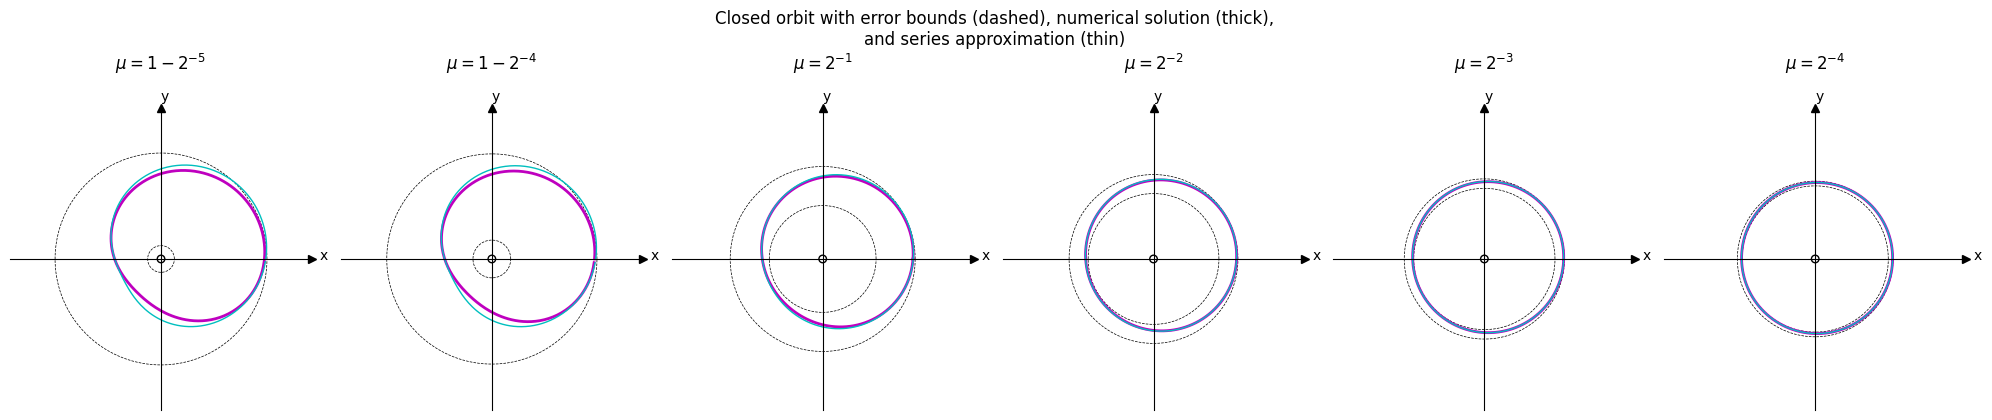

In [4]:
def rdot(theta, r, mu):
    return r*(1 - r**2) + mu*r*np.cos(theta)

def r_series(theta, mu):
    return 1 + mu*(2/5*np.cos(theta) + 1/5*np.sin(theta))

def numerical_orbit(mu, T=200*np.pi):
    sol = solve_ivp(rdot, [0, T], [1.0], args=(mu,), max_step=0.05, rtol=1e-9, atol=1e-9)
    mask = sol.t > (T - 2*np.pi)
    theta = sol.t[mask]
    r = sol.y[0][mask]
    theta -= theta[0]
    return theta, r

mus = [1-2**(-5),1-2**(-4), 2**(-1), 2**(-2), 2**(-3), 2**(-4)]
muZ = ['$1-2^{-5}$','$1-2^{-4}$', '$2^{-1}$', '$2^{-2}$', '$2^{-3}$', '$2^{-4}$']
fig, axes = plt.subplots(1, 6, figsize=(20,4))

for ax, mu, mZ in zip(axes, mus, muZ):
    theta, r_num = numerical_orbit(mu)
    r_app = r_series(theta, mu)
    x_num = r_num*np.cos(theta)
    y_num = r_num*np.sin(theta)
    x_app = r_app*np.cos(theta)
    y_app = r_app*np.sin(theta)
    th = np.linspace(0, 2*np.pi, 400)
    r_min = np.sqrt(1 - mu)
    r_max = np.sqrt(1 + mu)
    
    customize_axes(ax)
    ax.plot(r_min*np.cos(th), r_min*np.sin(th), 'k--', lw=0.51)
    ax.plot(r_max*np.cos(th), r_max*np.sin(th), 'k--', lw=0.51)
    ax.plot(x_num, y_num, 'm', lw=2, label='Numerical')
    ax.plot(x_app, y_app, 'c', lw=1, label='Series')
    ax.set_title(rf'$\mu =${mZ}',y=1.1)
    c=plt.Circle((0, 0), 0.05, color='k', fill=False)
    ax.add_artist(c)
    ax.set_aspect('equal')
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True)
    ax.text(0,2.1,'y')
    ax.text(2.1,0,'x')

plt.suptitle(
    "Closed orbit with error bounds (dashed), numerical solution (thick),\n"
    "and series approximation (thin)",y=1.05)
plt.tight_layout()
plt.show()

mu		max error
0.12500	2.5427444e-03
0.25000	7.5860073e-03
0.37500	1.7380943e-02
0.50000	2.9612904e-02
0.62500	4.2447407e-02
0.75000	6.8292995e-02
0.87500	1.0075590e-01
0.03125	4.3649923e-04
0.06250	9.7948029e-04
0.09375	1.6789979e-03
0.12500	2.5427444e-03
0.15625	3.5686544e-03
0.18750	4.7527766e-03
0.21875	6.0949658e-03

Quadratic fit:
Error ≈ (1.4980e-01) μ² + (-2.2560e-02) μ + (2.8006e-03)


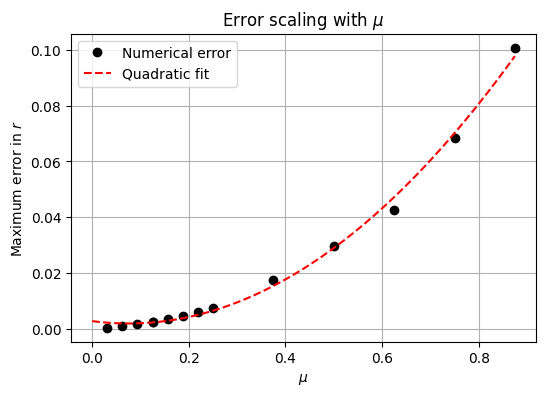

In [5]:
mu_values = np.array([1/8,2/8,3/8,4/8,5/8,6/8,7/8, 1/32, 2/32, 3/32, 4/32, 5/32, 6/32, 7/32])
errors = []

for mu in mu_values:
    theta, r_num = numerical_orbit(mu)
    r_app = r_series(theta, mu)
    max_error = np.max(np.abs(r_num - r_app))
    errors.append(max_error)

errors = np.array(errors)
print("mu\t\tmax error")
for mu, err in zip(mu_values, errors):
    print(f"{mu:.5f}\t{err:.7e}")
 
coeffs = np.polyfit(mu_values, errors, 2)
a, b, c = coeffs
print("\nQuadratic fit:")
print(f"Error ≈ ({a:.4e}) μ² + ({b:.4e}) μ + ({c:.4e})")
mu_plot = np.linspace(0, mu_values.max(), 200)
fit_curve = a*mu_plot**2 + b*mu_plot + c

plt.figure(figsize=(6,4))
plt.plot(mu_values, errors, 'ko', label='Numerical error')
plt.plot(mu_plot, fit_curve, 'r--', label='Quadratic fit')
plt.xlabel(r'$\mu$')
plt.ylabel('Maximum error in $r$')
plt.title('Error scaling with $\mu$')
plt.legend()
plt.grid(True)
plt.show()

**EXAMPLE 7.3.2** :
#### System
In the fundamental biochemical process called glycolysis, living cells obtain energy by breaking down sugar.                                                    
In intact yeast cells as well as in yeast or muscle extracts, glycolysis can proceed in an oscillatory fashion,                                              
with the concentrations of various intermediates waxing and waning with a period of several minutes.                                                                                           
For reviews, see Chance et al. (1973) or Goldbeter (1980).                                                                                                        
A simple model of these oscillations has been proposed by Sel’kov (1968).                                                                                      
In dimensionless form, the equations are                                                                                                                             
$\qquad\begin{aligned} 
\dot{x}&=-x + ay + x^2y \\
\dot{y}&=\;\;\;b-ay-x^2y  
\end{aligned}$                                                                                                                                             
where $x$ and $y$ are the concentrations of ADP (adenosine diphosphate) and F6P (fructose-6-phosphate), and $a,b > 0$ are kinetic parameters.                     
Construct a trapping region for this system.

#### Fixed points $(x^*,y^*)$

Fixed points satisfy

$\qquad\dot x = 0, \qquad \dot y = 0.$

From your equations:

$\qquad\begin{aligned}
\dot x = 0 &\Rightarrow y = \frac{x}{a+x^2}, \\
\dot y = 0 &\Rightarrow y = \frac{b}{a+x^2}.
\end{aligned}$

Equating the two expressions for $y$ :

$\qquad\displaystyle\frac{x}{a+x^2} = \frac{b}{a+x^2}.$

Since $a+x^2 \neq 0$,

$\qquad x = b.$

Substitute back to get $y$ :

$\qquad\displaystyle y = \frac{b}{a+b^2}.$

 Fixed point

$\qquad\displaystyle\boxed{(x^*,y^*) = \left(b, \frac{b}{a+b^2}\right)}$

#### Jacobian matrix for the System

$\qquad\begin{aligned}
\dot{x} &= -x + ay + x^2 y, \\
\dot{y} &= b - ay - x^2 y.
\end{aligned}$


#### Jacobian
$\qquad\displaystyle J(x,y) =\begin{pmatrix} \frac{\partial \dot x}{\partial x} & \frac{\partial \dot x}{\partial y} \\ \frac{\partial \dot y}{\partial x} & \frac{\partial \dot y}{\partial y} \end{pmatrix} = \begin{pmatrix} -1 + 2xy & a + x^2 \\ -2xy & -(a + x^2) \end{pmatrix}.$

#### Jacobian evaluated at the fixed point

At

$\qquad \displaystyle x^* = b, \qquad y^* = \frac{b}{a+b^2},$

we have

$\qquad \displaystyle 2x^*y^* = \frac{2b^2}{a+b^2}.$

So

$\qquad J^* = \begin{pmatrix} -1 + \dfrac{2b^2}{a+b^2} & a+b^2 \\ -\dfrac{2b^2}{a+b^2} & -(a+b^2) \end{pmatrix}.$

####  Determinant

Often needed for stability classification:

$\qquad\begin{aligned}
\det(J^*)
&= (-1 + 2xy)(-(a+x^2)) - (a+x^2)(-2xy) = a + x^2.
\end{aligned}$


Evaluated at the fixed point:

$\qquad\boxed{\det(J^*) = a + b^2 > 0}$


#### Trace of the Jacobian

$\qquad\begin{aligned}
\operatorname{tr}(J^*)
&= \left(-1 + \frac{2b^2}{a+b^2}\right) - (a+b^2) \\
&= \frac{b^2 - a}{a+b^2} - (a+b^2) \\
&= \frac{b^2 - a - (a+b^2)^2}{a+b^2} \\
&= -\frac{b^4 + (2a+1)b^2 +(a+a^2)}{a+b^2}.
\end{aligned}$


Or, combined into a single fraction:

$\qquad\boxed{\operatorname{tr}(J^*)= -\frac{b^4 + (2a+1)b^2 +(a+a^2)}{a+b^2}}$

**Stability of the fixed point**

Since $\det A>0$ :

* $\tau>0$ → unstable node or spiral (repeller)
* $\tau<0$ → stable node or spiral (attractor)

Thus the fixed point is **unstable when**

$\qquad b^4+(2a-1)b^2+(a+a^2)<0.$

**Dividing line $\tau=0$**

Set the numerator equal to zero :

$\qquad b^4+(2a-1)b^2+(a+a^2)=0.$

This is a quadratic in $b^2$ :

$\qquad (b^2)^2+(2a-1)b^2+(a+a^2)=0.$

Solving,

$\qquad\boxed{b^2=\frac12\Bigl(1-2a\pm\sqrt{1-8a}\Bigr)}$

This curve divides parameter space into :

* **unstable fixed point** ($\tau>0$)
* **stable fixed point** ($\tau<0$)

Real solutions require

$\qquad\boxed{a\le \tfrac18.}$


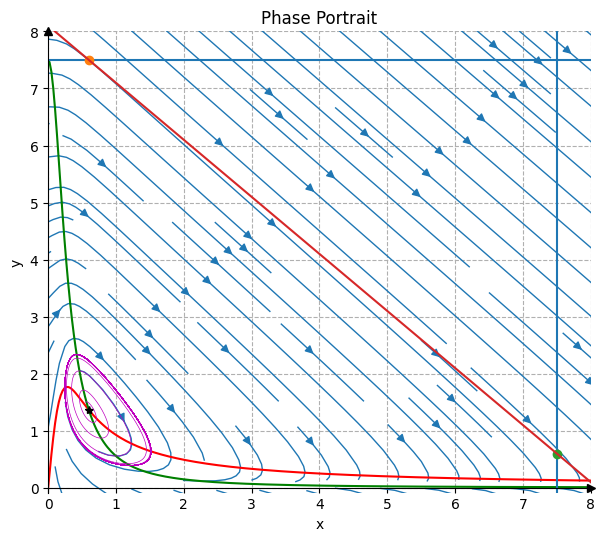

In [6]:
def f(X, const):
    a,b = const
    x,y = X
    dx = -x+a*y+x**2*y
    dy =  b-a*y-x**2*y
    return dx, dy

def F(t, X, a, b):
    const = a,b
    return f(X, const)
    
a, b = 0.08,0.6
t_span = (0, 300)
sol = solve_ivp(F,t_span,[0.55,1.5],args=(a,b,),max_step=0.05,rtol=1e-8,atol=1e-10)

x = np.linspace(-1, 10, 400)
y = np.linspace(-1, 10, 400)
X, Y = np.meshgrid(x, y)
U, V = f((X, Y), (a, b))

fig,ax=plt.subplots(figsize=(7, 6))
ax.streamplot(X, Y, U, V, density=1.2, linewidth=1, arrowsize=1.2)
ax.plot(x, x / (a + x**2), 'r', label=r'$\dot{x}=0$')
ax.plot(x, b / (a + x**2), 'g', label=r'$\dot{y}=0$')
ax.plot(b, b/(a+b**2), 'k*', label='Fixed point at $({0}, {1})$'.format(b,np.round(b/(a+b**2),2)))

ax.axhline(y=b/a)
ax.plot(b,b/a,'o')
ax.axvline(b/a)
ax.plot(b/a,b,'o')
ax.plot(x,-x+b+b/a, '-')
ax.plot(sol.y[0], sol.y[1], 'm', lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Phase Portrait")
ax.set_xlim(0, 8)
ax.set_ylim(-0.1, 8)
ax.grid(linestyle='--')
customize_axes(ax)
plt.show()

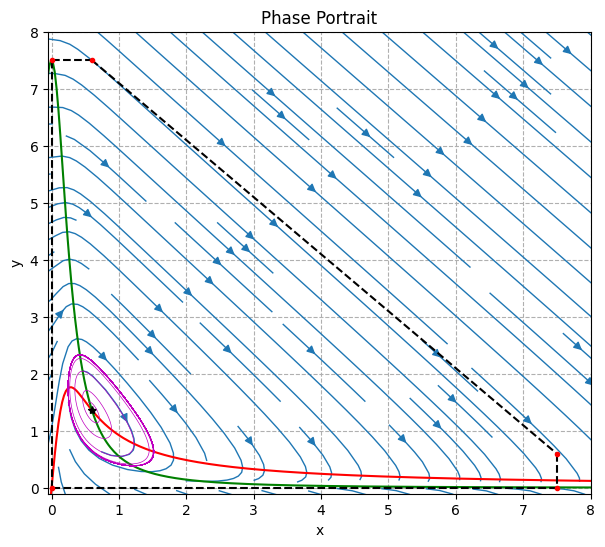

In [7]:

def L_function(t, Q):
    edge_points_list = []
    t = t.reshape(-1, 1)
    for i in range(len(Q)):
        edge_points = Q[i] + t * (Q[(i+1) % len(Q)] - Q[i])
        edge_points_list.append(edge_points)
    return np.array(edge_points_list)

a = 0.08
b = 0.6
Q = np.array([[0, b/a], [b, b/a], [b/a, b], [b/a, 0], [0,0]])
t = np.linspace(0, 1, 1000)
L = L_function(t,Q)
vertex_names = ['A', 'B', 'C', 'D']

fig,ax=plt.subplots(figsize=(7, 6))
ax.streamplot(X, Y, U, V, density=1.2, linewidth=1, arrowsize=1.2)
ax.plot(x, x / (a + x**2), 'r', label=r'$\dot{x}=0$')
ax.plot(x, b / (a + x**2), 'g', label=r'$\dot{y}=0$')
ax.plot(b, b/(a+b**2), 'k*', label='Fixed point at $({0}, {1})$'.format(b,np.round(b/(a+b**2),2)))

for edge_points in L:
    plt.plot(edge_points[:, 0], edge_points[:, 1], 'k--')
for edge_points in Q:
    plt.plot(edge_points[ 0], edge_points[ 1], 'r.')

ax.plot(sol.y[0], sol.y[1], 'm', lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Phase Portrait")
ax.set_xlim(-0.05, 8)
ax.set_ylim(-0.1, 8)
ax.grid(linestyle='--')
plt.show()

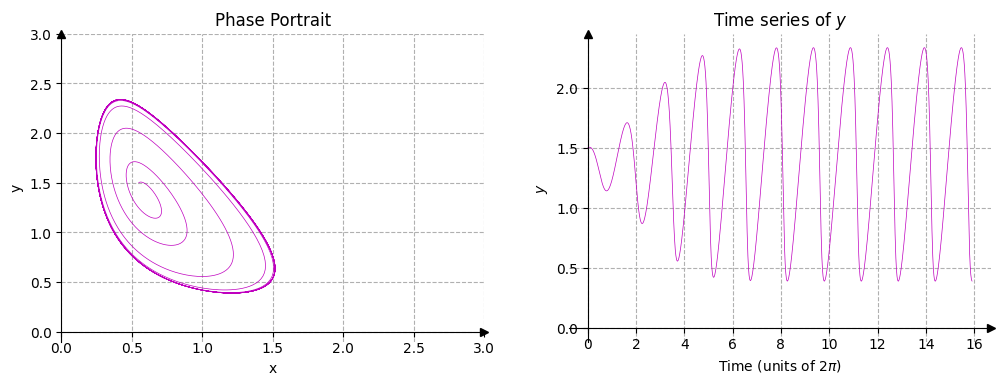

In [8]:
t = (0, 100)
sol = solve_ivp(F, t, [0.55, 1.5], args=(a, b), max_step=0.05, rtol=1e-8, atol=1e-10)
t_scaled = sol.t / (2 * np.pi)

fig, ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(sol.y[0], sol.y[1], 'm', lw=0.5)
ax[0].set_xlim(0, 3)
ax[0].set_ylim(-0.1, 3)
ax[0].grid(linestyle='--')
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Phase Portrait")
customize_axes(ax[0])
ax[1].plot(t_scaled, sol.y[1], 'm', lw=0.5)
ax[1].set_xlabel('Time (units of $2\pi$)')
ax[1].set_ylabel('$y$')
ax[1].set_title('Time series of $y$')
ax[1].grid(linestyle='--')
customize_axes(ax[1])
plt.show()

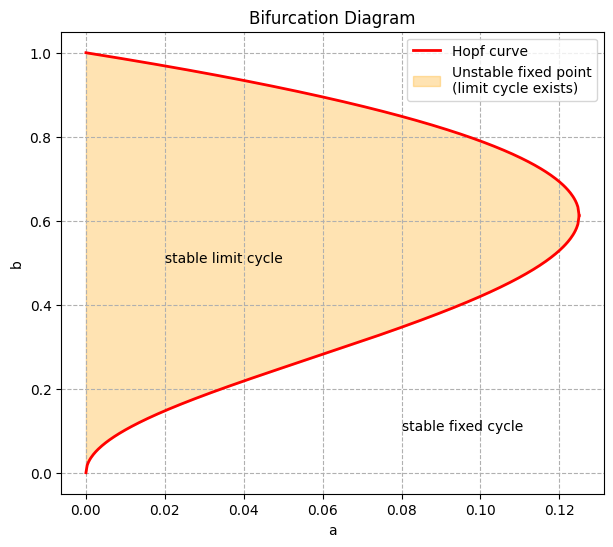

In [9]:
a_vals = np.linspace(0, 0.125, 400)
disc = np.sqrt(1 - 8*a_vals)

b1 = np.sqrt(0.5*(1 - 2*a_vals + disc))
b2 = np.sqrt(0.5*(1 - 2*a_vals - disc))

plt.figure(figsize=(7,6))
plt.plot(a_vals, b1, 'r', lw=2, label="Hopf curve")
plt.plot(a_vals, b2, 'r', lw=2)
plt.fill_between(a_vals, b2, b1, color='orange', alpha=0.3,
                 label="Unstable fixed point\n(limit cycle exists)")

plt.xlabel("a")
plt.ylabel("b")
plt.title("Bifurcation Diagram")
plt.text(0.02, 0.5,'stable limit cycle')
plt.text(0.08, 0.1,'stable fixed cycle')
plt.legend()
plt.grid(linestyle='--')
plt.show()


#### Reference :

1. Sel’kov, E. E. (1968). *Self-oscillations in glycolysis. **A simple kinetic model**.* Eur. 
J. Biochem. 4, 79.